# TP2

La fonction que’on cherche à minimiser est la somme des distances entre les villes dans
l’itinéraire du problème du voyageur de commerce. Mathématiquement, cela peut être
formulé comme suit :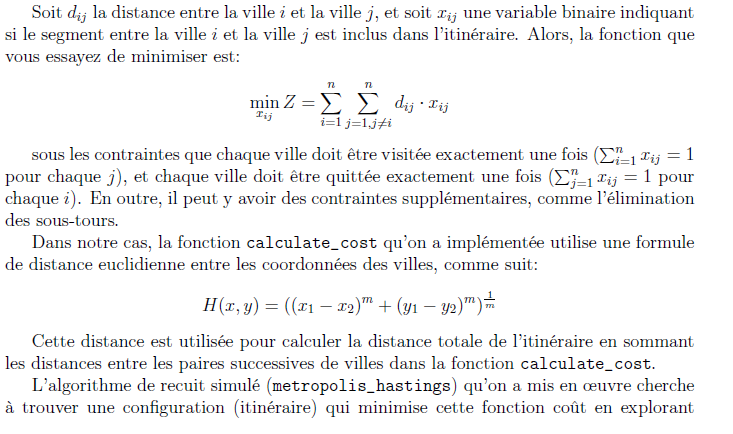


différentes solutions et en acceptant ou rejetant les changements basés sur la probabilité
d’acceptation déterminée par la température et la différence de coût entre la nouvelle et
l’ancienne solution.

## Code python du TP2

In [ ]:
import numpy as np
import cmath

def generate_infinite_curve(nombre_points):
    """
    Genere une courbe infinie dans le plan en utilisant les coordonnées paramétriques.

    :param nombre_points: Nombre de points sur la courbe
    :return: Liste de points (x, y) sur la courbe
    """
    t = np.linspace(0, 2 * np.pi, nombre_points)
    x_points = []
    y_points = []
    L = []

    for angle in t:
        x = np.sin(angle)
        y = np.cos(angle) * np.sin(angle)
        x_points.append(x)
        y_points.append(y)
        L.append((x, y))

    return L

def generate_grid_points(n):
    """
    Génère une grille régulière de points dans le plan.

    :param n: Nombre de points dans chaque direction
    :return: Liste de points (x, y) sur la grille
    """
    grid = []
    for i in range(n):
        for j in range(n):
            grid.append((i, j))
    return grid

def generate_concentric_circles_points(nombre_points):
    """
    Génère des points sur deux cercles concentriques dans le plan complexe.

    :param nombre_points: Nombre de points sur chaque cercle
    :return: Liste de points (x, y) sur les cercles
    """

    def cercle_unite(rayon, nombre_points):
        points_cercle = []
        for k in range(nombre_points):
            z = cmath.exp(2j * cmath.pi * k / nombre_points)
            x = rayon * z.real
            y = rayon * z.imag
            points_cercle.append((x, y))
        return points_cercle

    rayon_petit = 10
    rayon_grand = 20

    points_petit_cercle = cercle_unite(rayon_petit, nombre_points)
    points_grand_cercle = cercle_unite(rayon_grand, nombre_points)

    return points_petit_cercle + points_grand_cercle
import math
import random
import matplotlib.pyplot as plt

def H(x1, y1, x2, y2):
    return ((x1 - x2) ** m + (y1 - y2) ** m) ** (1/m)

def calculate_cost(grid, route, coordinates):
    cost = 0
    for i in range(len(route) - 1):
        cost += distance(
            coordinates[route[i]][0],
            coordinates[route[i]][1],
            coordinates[route[i + 1]][0],
            coordinates[route[i + 1]][1]
        )
    return cost

def metropolis_hastings(grid, route, coordinates, temperature, iteration):
    current_cost = calculate_cost(grid, route, coordinates)
    best_cost = current_cost
    best_route = route

    for _ in range(iteration):
        neighbour_route = generate_neighbour(route, coordinates)
        neighbour_cost = calculate_cost(grid, neighbour_route, coordinates)

        # Calculer la probabilité d’acceptation
        acceptance_prob = min(1, math.exp((current_cost - neighbour_cost) / temperature))

        # Accepter la nouvelle solution avec une probabilité donnée
        if random.random() < acceptance_prob:
            current_cost = neighbour_cost
            route = neighbour_route

        # Mettre à jour la meilleure solution trouvée jusqu’à présent
        if current_cost < best_cost:
            best_cost = current_cost
            best_route = route

    return best_cost, best_route

def generate_neighbour(route, coordinates):
    neighbour_route = route[:]
    i, j = random.sample(range(len(route)), 2)
    neighbour_route[i], neighbour_route[j] = neighbour_route[j], neighbour_route[i]
    return neighbour_route

def plot_solution(coordinates, route, grid_points):
    route_coordinates = [coordinates[i] for i in route]

    x = [coord[0] for coord in route_coordinates]
    y = [coord[1] for coord in route_coordinates]

    optimal_route = list(zip(x, y))  # Convertir les coordonnées en tuples

    plt.scatter([point[0] for point in grid_points], [point[1] for point in grid_points], color='g', label='Grid Points')
    plt.plot(x, y, marker='.', linestyle='-', color='b', label='Optimal Route')
    plt.scatter(x, y, color='r', label='Cities')
    plt.title('Optimal Route and Cities on the Grid')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    return optimal_route

def main():
    n = 50
    m = 2
    grid_points = generate_grid_points(n)
    random.shuffle(grid_points)
    grid = generate_grid_points(n)
    route = list(range(len(grid_points)))
    coordinates = grid_points
    temperature = 1000.0
    iteration = 1000
    cost, route = metropolis_hastings(grid, route, coordinates, temperature, iteration)
    print("Minimum cost:", cost)
    plot_solution(coordinates, route, grid_points)

if __name__ == "__main__":
    n = 10
    m = 2
    grid_points = generate_grid_points(n)
    random.shuffle(grid_points)
    grid = generate_grid_points(n)
    route = list(range(len(grid_points)))
    coordinates = grid_points
    temperature = 1000.0
    iteration = 1000
    cost, route = metropolis_hastings(grid, route, coordinates, temperature, iteration)
    print("Minimum cost:", cost)
    optimal_route = plot_solution(coordinates, route, grid_points)
    print("Optimal route (coordinates):", optimal_route)


Minimum cost: 914655.5

Optimal route (coordinates): [(45, 12), (9, 1), (45, 5), (49, 46), (45, 17), (7, 37), (42, 11),
(15, 14), (1, 28), (16, 34), (18, 32), (43, 1), (48, 24), (8, 36), (9, 32), (49, 4), (7, 4), (46,
10), (32, 7), (19, 30), (10, 49), (44, 0), (5, 45), (4, 36), (33, 27), (23, 30), (48, 46), (31,
11), (38, 29), (15, 40), (1, 38), (26, 5), (15, 4), (44, 23), (18, 28), (0, 19), (4, 44), (20,
11
23), (23, 45), (27, 10), (7, 44), (45, 25), (43, 49), (31, 15), (1, 4), (0, 30), (42, 43), (43,
17), (47, 31), (9, 35), (49, 7), (19, 6), (23, 42), (34, 36), (0, 41), (5, 12), (40, 14), (47, 5),
(11, 21), (16, 4), (3, 44), (0, 10), (29, 34), (46, 21), (36, 32), (35, 15), (39, 27), (16, 41),
(31, 49), (11, 22), (13, 12), (36, 24), (9, 24), (16, 16), (39, 37), (24, 25), (42, 37), (29,
38), (27, 21), (10, 28), (13, 29), (44, 36), (16, 26), (11, 44), (34, 44), (42, 9), (3, 48), (42,
27), (44, 16), (21, 24), (7, 17), (21, 19), (38, 21), (25, 40), (43, 32), (46, 22), (1, 1), (19,
23), (2, 10), (27, 19), (43, 24), (20, 11), (38, 49), (45, 49), (21, 3), (5, 10), (17, 31), (3,
35), (5, 40), (18, 21), (3, 7), (28, 19), (12, 31), (16, 17), (28, 49), (26, 49), (35, 33), (35,
3), (46, 44), (35, 40), (24, 39), (49, 26), (1, 41), (16, 48), (15, 22), (42, 21), (34, 8), (23,
23), (10, 22), (37, 32), (25, 42), (49, 32), (44, 40), (26, 18), (30, 37), (5, 15), (6, 15), (7,
7), (4, 34), (5, 31), (14, 16), (27, 18), (12, 20), (39, 6), (9, 28), (28, 41), (5, 38), (47, 26),
(29, 37), (19, 22), (31, 48), (33, 7), (14, 20), (21, 16), (5, 25), (34, 11), (4, 42), (38, 25),
(46, 2), (39, 23), (46, 1), (37, 11), (22, 25), (17, 1), (14, 26), (40, 11), (29, 19), (17, 17),
(1, 5), (21, 44), (6, 16), (19, 26), (16, 12), (22, 47), (10, 29), (5, 3), (44, 14), (5, 39), (17,
7), (24, 49), (47, 2), (20, 35), (28, 6), (21, 11), (35, 31), (33, 43), (49, 27), (3, 27), (29,
41), (35, 2), (33, 17), (26, 6), (20, 15), (22, 49), (26, 10), (39, 49), (14, 42), (8, 43), (31,
30), (45, 42), (43, 47), (29, 0), (39, 19), (17, 37), (45, 21), (22, 43), (27, 3), (23, 11), (30,
31), (9, 33), (5, 23), (20, 14), (48, 13), (25, 12), (49, 19), (30, 43), (20, 44), (48, 36), (20,
5), (33, 45), (13, 36), (3, 6), (30, 7), (40, 48), (27, 30), (49, 8), (37, 40), (20, 33), (18, 1),
(10, 4), (8, 35), (33, 18), (17, 39), (26, 25), (10, 16), (32, 2), (16, 32), (19, 8), (32, 1),
(16, 27), (12, 28), (35, 41), (12, 35), (11, 41), (48, 11), (36, 39), (38, 2), (8, 3), (40, 42),
(48, 44), (41, 36), (46, 7), (22, 14), (3, 23), (22, 31), (20, 21), (9, 7), (9, 45), (26, 38), (3,
20), (20, 12), (9, 9), (12, 25), (0, 4), (21, 0), (40, 4), (37, 16), (27, 34), (38, 28), (41, 19),
(11, 8), (8, 34), (27, 43), (10, 31), (24, 31), (33, 32), (11, 39), (18, 8), (2, 49), (2, 22),
(11, 32), (16, 3), (15, 30), (47, 20), (44, 11), (3, 9), (24, 35), (7, 46), (34, 22), (14, 21),
(3, 18), (10, 45), (20, 16), (4, 29), (10, 24), (5, 9), (11, 6), (39, 17), (31, 21), (32, 28),
(19, 7), (25, 44), (47, 46), (24, 28), (40, 33), (42, 3), (41, 33), (48, 21), (42, 42), (46, 46),
(32, 19), (35, 34), (43, 26), (47, 9), (17, 21), (8, 33), (7, 20), (45, 7), (11, 16), (27, 28),
(1, 10), (3, 42), (42, 17), (27, 15), (23, 35), (24, 14), (29, 16), (3, 5), (35, 8), (27, 11), (6,
32), (20, 38), (24, 47), (13, 35), (19, 33), (13, 19), (45, 1), (41, 8), (38, 48), (21, 26), (34,
39), (12, 18), (37, 38), (45, 33), (24, 46), (47, 43), (35, 46), (8, 1), (21, 49), (13, 40), (25,
1), (39, 0), (17, 33), (4, 49), (19, 43), (14, 36), (28, 10), (2, 27), (49, 22), (23, 2), (23,
34), (42, 7), (22, 36), (24, 26), (0, 35), (24, 18), (22, 40), (35, 10), (20, 30), (47, 41), (17,
43), (24, 12), (6, 17), (3, 43), (26, 20), (44, 26), (37, 42), (33, 1), (19, 20), (1, 22), (20,
24), (48, 35), (44, 32), (7, 48), (40, 49), (37, 19), (44, 41), (20, 34), (32, 0), (47, 10), (21,
23), (49, 10), (43, 42), (15, 38), (16, 46), (47, 12), (43, 16), (33, 4), (48, 29), (20, 3), (36,
31), (46, 12), (22, 4), (1, 36), (4, 7), (29, 9), (45, 36), (5, 24), (11, 14), (32, 17), (38, 31),
(24, 33), (23, 46), (37, 15), (34, 2), (42, 8), (3, 39), (3, 8), (49, 39), (5, 43), (21, 17), (44,
7), (31, 26), (35, 38), (42, 32), (48, 43), (42, 20), (34, 37), (12, 27), (16, 36), (8, 8), (11,
25), (14, 35), (20, 36), (32, 45), (0, 8), (22, 38), (2, 28), (18, 14), (37, 5), (49, 18), (21,
27), (21, 32), (48, 12), (15, 17), (21, 1), (1, 12), (48, 47), (27, 40), (23, 41), (41, 49), (1,
13), (39, 43), (8, 0), (43, 30), (26, 1), (36, 16), (35, 16), (30, 3), (21, 10), (34, 10), (12,
10), (14, 32), (6, 24), (15, 39), (17, 16), (13, 37), (37, 23), (46, 24), (36, 7), (43, 28), (13,
9), (21, 20), (12, 38), (34, 12), (35, 9), (25, 0), (10, 46), (23, 19), (39, 40), (5, 26), (41,
40), (26, 29), (2, 13), (42, 45), (31, 32), (29, 21), (40, 28), (46, 42), (24, 5), (42, 6), (24,
9), (33, 31), (22, 17), (29, 36), (36, 29), (17, 29), (22, 26), (27, 26), (44, 49), (23, 9), (27,
16), (19, 32), (41, 46), (25, 29), (40, 25), (40, 46), (36, 36), (4, 35), (17, 44), (40, 43), (2,
24), (49, 17), (31, 44), (30, 26), (22, 41), (12, 40), (30, 39), (45, 27), (0, 20), (17, 11), (25,
12
20), (9, 2), (12, 22), (29, 15), (46, 18), (38, 33), (12, 23), (33, 3), (33, 24), (12, 8), (25,
2), (27, 2), (2, 11), (20, 43), (25, 21), (40, 27), (28, 9), (31, 6), (25, 14), (6, 42), (48, 0),
(32, 8), (9, 40), (13, 42), (4, 11), (34, 40), (45, 39), (46, 26), (33, 15), (0, 46), (32, 42),
(8, 10), (5, 21), (38, 43), (14, 10), (42, 24), (26, 4), (49, 29), (41, 45), (35, 45), (7, 22),
(8, 11), (9, 43), (11, 46), (32, 44), (8, 42), (23, 18), (44, 8), (24, 37), (46, 39), (29, 6), (4,
33), (31, 22), (5, 16), (30, 41), (40, 17), (9, 0), (42, 29), (13, 21), (38, 20), (17, 12), (16,
6), (18, 5), (40, 20), (9, 29), (42, 10), (41, 25), (26, 44), (18, 30), (5, 5), (3, 32), (38, 18),
(14, 24), (24, 36), (36, 2), (38, 15), (1, 0), (49, 16), (6, 35), (2, 30), (23, 21), (22, 33), (13,
22), (35, 42), (44, 34), (36, 40), (37, 3), (4, 17), (10, 15), (1, 39), (16, 29), (26, 7), (35,
24), (46, 20), (26, 31), (31, 43), (0, 37), (12, 29), (25, 6), (49, 24), (22, 16), (33, 19), (40,
45), (1, 21), (37, 13), (34, 21), (16, 30), (26, 15), (23, 38), (45, 23), (44, 17), (49, 23),
(31, 7), (32, 23), (26, 39), (21, 9), (20, 31), (21, 33), (34, 30), (27, 4), (47, 30), (9, 47),
(36, 41), (47, 28), (28, 0), (41, 0), (15, 12), (27, 38), (10, 34), (26, 12), (30, 48), (47, 47),
(24, 44), (34, 32), (24, 17), (17, 0), (6, 8), (33, 28), (36, 22), (12, 24), (41, 37), (27, 44),
(16, 28), (3, 41), (28, 21), (36, 42), (16, 21), (28, 35), (49, 20), (46, 37), (47, 37), (12, 6),
(42, 18), (36, 34), (20, 1), (14, 18), (26, 40), (6, 9), (14, 34), (17, 18), (37, 8), (1, 37), (0,
21), (14, 11), (23, 25), (30, 16), (7, 35), (15, 33), (41, 20), (39, 22), (39, 4), (16, 11), (13,
44), (3, 2), (31, 20), (38, 46), (30, 42), (40, 10), (31, 36), (15, 0), (33, 6), (37, 49), (21,
28), (36, 14), (15, 49), (18, 0), (9, 48), (3, 36), (48, 10), (18, 7), (39, 28), (22, 22), (12,
45), (40, 31), (18, 45), (29, 40), (39, 24), (27, 5), (36, 18), (39, 32), (13, 46), (22, 32), (5,
18), (41, 41), (42, 26), (44, 3), (41, 11), (43, 10), (29, 31), (15, 10), (42, 34), (20, 47),
(14, 30), (30, 25), (0, 0), (45, 35), (46, 48), (34, 14), (47, 36), (38, 42), (22, 13), (30, 2),
(40, 18), (49, 36), (32, 31), (22, 30), (21, 12), (29, 13), (18, 25), (35, 22), (49, 12), (46,
33), (31, 12), (31, 40), (37, 44), (48, 14), (45, 15), (47, 4), (43, 13), (35, 18), (9, 6), (22,
5), (10, 19), (25, 27), (32, 39), (28, 7), (14, 33), (12, 26), (23, 33), (17, 28), (5, 33), (9,
27), (12, 9), (8, 7), (36, 35), (35, 43), (13, 45), (8, 48), (8, 47), (9, 46), (6, 31), (40, 22),
(39, 1), (13, 26), (7, 23), (7, 39), (37, 14), (37, 0), (17, 48), (37, 36), (48, 1), (27, 9), (7,
32), (31, 41), (14, 27), (39, 8), (23, 26), (14, 15), (32, 15), (2, 1), (23, 28), (25, 41), (43,
43), (46, 36), (1, 9), (49, 47), (16, 23), (26, 9), (33, 29), (9, 19), (41, 31), (38, 45), (30,
21), (36, 23), (11, 29), (4, 27), (30, 47), (42, 36), (0, 11), (22, 3), (32, 35), (22, 35), (40,
34), (26, 35), (44, 45), (5, 32), (37, 9), (9, 31), (6, 34), (25, 4), (36, 4), (3, 12), (33, 21),
(1, 2), (33, 2), (49, 30), (25, 31), (36, 20), (45, 26), (8, 13), (16, 37), (19, 46), (1, 6), (31,
47), (26, 13), (8, 49), (17, 19), (38, 47), (6, 29), (33, 23), (25, 36), (7, 24), (8, 5), (9, 39),
(43, 48), (0, 43), (10, 12), (4, 23), (7, 3), (35, 5), (14, 3), (3, 24), (5, 36), (5, 6), (1, 29),
(35, 14), (15, 27), (43, 33), (48, 17), (46, 4), (24, 10), (6, 30), (0, 23), (11, 19), (20, 4),
(39, 44), (10, 35), (25, 9), (6, 10), (16, 49), (48, 39), (45, 0), (16, 18), (2, 16), (20, 8), (23,
6), (19, 15), (38, 34), (40, 38), (33, 13), (12, 44), (16, 0), (11, 17), (18, 38), (21, 31), (43,
12), (46, 5), (15, 11), (11, 31), (29, 1), (15, 43), (22, 12), (45, 13), (16, 1), (13, 28), (14,
49), (4, 22), (36, 1), (8, 38), (10, 9), (37, 17), (45, 9), (5, 42), (47, 49), (44, 29), (34, 3),
(27, 8), (30, 29), (39, 39), (19, 9), (6, 36), (10, 33), (14, 47), (33, 9), (18, 22), (19, 38),
(0, 40), (8, 12), (4, 20), (18, 23), (39, 38), (33, 46), (44, 20), (10, 20), (20, 40), (42, 49),
(31, 42), (9, 3), (16, 22), (0, 29), (42, 44), (0, 32), (1, 33), (25, 32), (43, 20), (41, 16), (24,
40), (0, 22), (0, 18), (35, 27), (13, 3), (43, 7), (47, 17), (46, 31), (13, 47), (37, 45), (45,
29), (4, 18), (6, 19), (12, 13), (25, 43), (42, 19), (18, 27), (37, 41), (0, 31), (48, 26), (18,
3), (5, 41), (45, 41), (22, 8), (2, 26), (23, 3), (7, 43), (31, 8), (33, 35), (0, 16), (15, 7), (29,
8), (7, 5), (44, 21), (42, 1), (21, 14), (34, 43), (40, 2), (34, 9), (1, 48), (2, 34), (22, 1), (7,
45), (34, 38), (22, 48), (26, 22), (24, 6), (2, 37), (19, 39), (33, 41), (18, 18), (25, 49), (2,
19), (0, 6), (23, 4), (41, 15), (27, 12), (0, 1), (0, 3), (31, 34), (25, 45), (32, 36), (49, 3),
13
(38, 17), (45, 20), (32, 16), (15, 18), (15, 8), (19, 10), (2, 5), (40, 5), (38, 19), (49, 31),
(37, 18), (6, 22), (17, 5), (5, 48), (24, 48), (4, 21), (4, 5), (26, 34), (47, 29), (9, 44), (20,
29), (13, 33), (49, 48), (20, 41), (19, 49), (1, 44), (19, 24), (5, 30), (24, 13), (2, 35), (20,
20), (11, 20), (8, 20), (37, 7), (12, 1), (29, 25), (40, 36), (46, 35), (43, 21), (26, 21), (38,
30), (44, 47), (2, 23), (12, 42), (25, 38), (35, 48), (25, 26), (34, 47), (19, 34), (1, 49), (10,
40), (37, 27), (43, 27), (46, 3), (22, 37), (43, 22), (1, 46), (7, 2), (9, 17), (31, 29), (26, 24),
(13, 32), (38, 6), (6, 1), (17, 20), (48, 41), (15, 35), (36, 26), (10, 3), (20, 19), (48, 37),
(48, 2), (33, 37), (36, 28), (32, 25), (27, 17), (41, 24), (47, 44), (29, 45), (3, 1), (19, 28),
(46, 19), (44, 28), (5, 14), (10, 7), (2, 43), (2, 0), (36, 33), (47, 3), (44, 18), (37, 22), (33,
26), (19, 18), (23, 8), (25, 16), (1, 23), (1, 7), (22, 23), (19, 29), (39, 26), (4, 24), (3, 3),
(25, 22), (14, 5), (32, 5), (28, 38), (28, 25), (29, 24), (34, 5), (31, 10), (47, 6), (10, 5), (7,
49), (1, 32), (1, 15), (8, 19), (28, 3), (32, 12), (25, 33), (5, 34), (39, 7), (14, 19), (17, 15),
(4, 31), (4, 8), (39, 13), (11, 4), (19, 35), (17, 38), (2, 38), (6, 13), (45, 38), (10, 11), (43,
39), (13, 7), (46, 30), (45, 34), (12, 34), (9, 36), (4, 41), (11, 48), (3, 49), (23, 24), (18,
49), (18, 46), (20, 46), (43, 38), (12, 2), (31, 18), (24, 19), (31, 28), (43, 29), (33, 14),
(35, 0), (28, 4), (46, 17), (6, 45), (29, 27), (23, 31), (37, 39), (20, 28), (48, 23), (48, 8),
(9, 13), (12, 0), (13, 15), (24, 16), (43, 35), (44, 9), (43, 36), (41, 1), (4, 1), (46, 11), (31,
14), (22, 28), (19, 1), (25, 30), (2, 29), (49, 42), (36, 46), (39, 47), (43, 37), (47, 35), (45,
19), (30, 15), (45, 4), (2, 20), (12, 16), (46, 47), (33, 10), (17, 9), (39, 5), (47, 14), (40,
16), (34, 28), (0, 27), (34, 7), (15, 26), (25, 28), (31, 17), (36, 3), (38, 10), (31, 33), (30,
27), (3, 30), (4, 16), (47, 23), (35, 13), (22, 34), (13, 24), (18, 43), (36, 6), (35, 17), (39,
14), (40, 12), (44, 15), (35, 36), (15, 45), (8, 28), (46, 25), (46, 28), (11, 34), (39, 46), (4,
10), (48, 6), (32, 41), (16, 9), (44, 37), (0, 42), (46, 6), (32, 30), (30, 35), (42, 31), (45,
18), (49, 15), (39, 12), (14, 7), (37, 12), (28, 45), (23, 44), (34, 27), (36, 48), (41, 12), (11,
9), (47, 48), (20, 32), (29, 42), (28, 43), (8, 24), (36, 9), (35, 11), (10, 47), (38, 23), (42,
5), (28, 32), (19, 47), (26, 8), (24, 43), (5, 8), (28, 2), (4, 26), (20, 22), (22, 27), (6, 33),
(33, 49), (48, 28), (38, 1), (1, 19), (29, 29), (43, 2), (13, 1), (15, 21), (44, 24), (27, 41),
(7, 18), (2, 44), (31, 35), (48, 34), (18, 35), (48, 31), (18, 40), (44, 43), (40, 32), (28, 15),
(36, 0), (28, 30), (40, 21), (37, 28), (0, 15), (23, 12), (18, 2), (40, 9), (11, 26), (42, 16),
(21, 37), (4, 38), (20, 37), (35, 37), (48, 15), (38, 14), (18, 15), (26, 28), (9, 20), (7, 11),
(8, 30), (8, 41), (38, 35), (11, 45), (12, 49), (20, 13), (13, 14), (3, 40),(20, 48), (20, 2),
(10, 30), (49, 0), (42, 4), (27, 1), (36, 37), (34, 19), (21, 22), (36, 19), (49, 2), (29, 17),
(33, 39), (1, 40), (44, 5), (23, 16), (22, 42), (15, 2), (37, 35), (17, 34), (19, 42), (23, 22),
(22, 24), (1, 11), (48, 19), (17, 47), (5, 47), (29, 28), (24, 38), (42, 30), (49, 14), (28, 16),
(1, 24), (29, 26), (34, 16), (2, 32), (41, 44), (10, 21), (45, 6), (33, 11), (39, 10), (36, 10),
(18, 4), (15, 34), (41, 34), (38, 5), (0, 38), (34, 41), (40, 30), (32, 47), (31, 38), (35, 25),
(5, 44), (34, 31), (40, 19), (4, 32), (0, 13), (45, 30), (10, 1), (15, 9), (0, 17), (16, 38), (32,
14), (37, 30), (21, 29), (19, 45), (9, 49), (43, 18), (0, 47), (14, 29), (45, 28), (12, 17), (49,
11), (40, 41), (28, 23), (24, 21), (14, 46), (14, 8), (29, 12), (42, 47), (24, 11), (45, 8), (49,
6), (9, 22), (0, 36), (36, 49), (24, 23), (43, 25), (43, 44), (29, 22), (25, 18), (15, 3), (46,
38), (7, 14), (33, 40), (2, 36), (6, 46), (14, 38), (1, 47), (7, 27), (16, 2), (46, 13), (45, 45),
(15, 28), (24, 1), (37, 20), (15, 25), (44, 6), (25, 25), (4, 43), (6, 37), (11, 49), (44, 48),
(13, 38), (32, 13), (2, 21), (8, 21), (12, 14), (8, 16), (34, 23), (19, 44), (48, 49), (27, 46),
(23, 14), (18, 47), (45, 40), (31, 16), (12, 15), (13, 23), (16, 15), (18, 10), (13, 17), (25,
10), (47, 7), (17, 45), (6, 47), (40, 29), (33, 25), (31, 46), (24, 20), (34, 29), (13, 11), (33,
33), (39, 30), (39, 2), (15, 19), (35, 49), (14, 48), (35, 30), (15, 24), (7, 29), (14, 2), (8,
18), (30, 17), (44, 25), (7, 19), (44, 30), (44, 44), (12, 30), (41, 39), (29, 10), (48, 48), (10,
37), (20, 6), (38, 11), (2, 7), (21, 47), (10, 17), (38, 39), (32, 27), (46, 32), (43, 15), (47,
14
1), (31, 2), (43, 4), (36, 30), (47, 45), (28, 42), (32, 26), (36, 17), (39, 15), (13, 39), (23,
36), (23, 10), (4, 0), (27, 31), (12, 7), (0, 34), (19, 31), (30, 18), (30, 49), (46, 16), (9, 26),
(33, 44), (28, 20), (22, 39), (43, 40), (2, 9), (25, 24), (40, 24), (47, 34), (6, 4), (33, 34),
(26, 0), (17, 22), (42, 13), (19, 37), (37, 33), (4, 6), (2, 39), (6, 44), (26, 30), (32, 37), (16,
42), (42, 41), (33, 42), (4, 12), (0, 44), (45, 2), (40, 3), (10, 25), (23, 47), (18, 33), (23,
43), (25, 11), (40, 39), (12, 39), (12, 48), (41, 3), (26, 3), (14, 14), (24, 0), (4, 19), (22, 6),
(13, 16), (6, 7), (26, 17), (23, 40), (47, 25), (6, 3), (45, 24), (42, 25), (35, 44), (22, 2), (38,
22), (44, 46), (29, 39), (41, 42), (46, 0), (20, 27), (14, 0), (37, 1), (49, 35), (43, 6), (14,
39), (21, 40), (18, 42), (9, 25), (15, 1), (3, 4), (14, 23), (17, 35), (28, 29), (47, 22), (47,
8), (12, 3), (4, 9), (11, 5), (37, 31), (41, 14), (45, 14), (44, 19), (35, 12), (17, 2), (14, 31),
(28, 8), (20, 49), (12, 12), (9, 10), (32, 22), (24, 27), (11, 23), (42, 14), (21, 38), (17, 23),
(43, 46), (11, 18), (29, 33), (41, 22), (27, 33), (21, 2), (3, 11), (6, 11), (11, 33), (49, 34),
(49, 21), (0, 7), (7, 21), (10, 10), (36, 5), (47, 27), (47, 16), (26, 16), (40, 1), (29, 11), (5,
29), (37, 48), (20, 26), (34, 48), (4, 39), (10, 32), (12, 41), (46, 27), (24, 22), (35, 4), (28,
31), (31, 3), (48, 7), (30, 13), (23, 27), (14, 12), (44, 33), (33, 22), (13, 27), (3, 22), (17,
8), (31, 37), (2, 42), (11, 27), (14, 4), (38, 9), (12, 47), (2, 33), (15, 16), (19, 21), (6, 2),
(42, 22), (3, 37), (42, 15), (39, 33), (6, 27), (29, 49), (13, 31), (14, 25), (9, 38), (10, 27),
(19, 19), (12, 19), (21, 35), (38, 32), (34, 42), (34, 34), (24, 8), (7, 31), (6, 6), (21, 42),
(48, 32), (29, 23), (0, 45), (35, 39), (41, 17), (2, 18), (24, 29), (28, 14), (29, 2), (29, 30),
(15, 41), (22, 19), (33, 47), (28, 11), (34, 6), (32, 18), (4, 30), (41, 38), (25, 48), (32, 11),
(28, 44), (44, 27), (8, 25), (5, 4), (10, 13), (22, 45), (34, 33), (3, 17), (22, 46), (35, 28),
(13, 34), (7, 10), (27, 24), (49, 13), (34, 17), (15, 23), (22, 20), (7, 13), (13, 2), (1, 31),
(7, 30), (31, 25), (23, 32), (32, 32), (37, 6), (21, 4), (14, 41), (30, 14), (8, 32), (20, 9), (5,
37), (26, 46), (30, 32), (14, 17), (38, 12), (46, 29), (16, 14), (32, 3), (38, 24), (26, 41), (45,
46), (3, 14), (45, 11), (16, 13), (47, 15), (19, 2), (20, 25), (1, 18), (4, 4), (26, 47), (30, 0),
(35, 32), (30, 34), (34, 26), (37, 10), (41, 35), (43, 45), (18, 34), (5, 11), (9, 15), (13, 30),
(10, 44), (46, 40), (26, 14), (3, 13), (6, 23), (14, 45), (5, 20), (12, 21), (9, 4), (7, 40), (16,
44), (21, 39), (0, 2), (35, 6), (17, 27), (32, 38), (2, 4), (17, 3), (36, 45), (24, 42), (18, 26),
(43, 14), (7, 41), (5, 46), (49, 9), (48, 27), (17, 41), (34, 15), (34, 0), (6, 20), (21, 25), (18,
37), (26, 37), (22, 18), (40, 44), (16, 25), (46, 41), (12, 32), (17, 13), (1, 43), (9, 14), (48,
5), (37, 29), (23, 5), (1, 14), (12, 43), (22, 10), (48, 16), (37, 25), (8, 2), (29, 20), (21, 5),
(3, 29), (3, 46), (33, 8), (42, 2), (40, 23), (28, 40), (0, 49), (2, 40), (32, 29), (28, 47), (40,
7), (27, 27), (42, 46), (38, 26), (25, 35), (13, 20), (21, 15), (13, 6), (15, 20), (11, 35), (8,
22), (34, 18), (14, 43), (14, 37), (49, 28), (18, 19), (18, 31), (17, 46), (30, 22), (26, 33),
(19, 3), (6, 28), (26, 32), (7, 12), (17, 26), (20, 10), (14, 28), (46, 14), (8, 9), (43, 9), (29,
3), (9, 18), (17, 10), (36, 11), (31, 5), (9, 21), (43, 5), (37, 2), (41, 18), (12, 36), (2, 17),
(30, 10), (41, 2), (25, 39), (11, 10), (21, 30), (45, 43), (37, 4), (41, 13), (42, 23), (17, 14),
(10, 23), (16, 5), (40, 8), (49, 38), (24, 34), (14, 22), (4, 3), (29, 14), (9, 5), (15, 37), (36,
38), (47, 19), (30, 30), (6, 38), (45, 3), (41, 23), (43, 23), (24, 32), (23, 1), (26, 11), (37,
43), (30, 9), (25, 19), (23, 48), (11, 43), (17, 25), (38, 3), (11, 12), (5, 13), (17, 32), (4,
2), (12, 5), (31, 0), (10, 18), (1, 30), (34, 13), (18, 39), (29, 48), (0, 48), (12, 46), (6, 18),
(7, 28), (18, 44), (31, 13), (9, 30), (39, 20), (4, 48), (3, 15), (48, 38), (42, 38), (34, 45),
(16, 47), (47, 18), (34, 20), (9, 23), (12, 37), (0, 25), (0, 9), (25, 13), (22, 9), (21, 48), (6,
49), (49, 5), (34, 1), (13, 25), (15, 15), (7, 42), (38, 37), (22, 11), (16, 45), (38, 13), (25,
37), (33, 38), (3, 34), (18, 13), (23, 0), (32, 6), (7, 26), (18, 6), (47, 0), (23, 39), (46, 8),
(36, 12), (28, 17), (20, 0), (39, 21), (14, 6), (18, 20), (32, 46), (38, 4), (5, 19), (19, 17),
(30, 36), (42, 33), (18, 41), (45, 37), (36, 8), (40, 13), (5, 35), (48, 40), (8, 37), (46, 49),
(1, 26), (45, 22), (10, 2), (16, 7), (24, 30), (41, 6), (29, 5), (24, 2), (39, 35), (25, 3), (15,
15
47), (2, 47), (3, 45), (17, 24), (40, 47), (24, 41), (21, 34), (38, 44), (27, 49), (46, 43), (27,
25), (15, 31), (31, 39), (8, 27), (11, 11), (21, 18), (16, 8), (48, 4), (3, 16), (28, 46), (38,
41), (35, 21), (6, 26), (2, 46), (45, 44), (44, 35), (2, 48), (37, 46), (30, 44), (22, 21), (24,
3), (10, 6), (19, 5), (20, 39), (8, 15), (11, 47), (9, 12), (39, 11), (7, 8), (27, 7), (3, 19), (19,
11), (25, 8), (43, 19), (9, 41), (17, 40), (3, 31), (24, 24), (43, 31), (15, 13), (39, 3), (44,
4), (44, 2), (27, 20), (3, 21), (43, 3), (40, 0), (48, 42), (30, 46), (27, 45), (7, 36), (24, 7),
(9, 11), (7, 38), (36, 44), (46, 45), (1, 20), (21, 43), (11, 3), (27, 13), (19, 12), (25, 17),
(26, 2), (15, 6), (13, 4), (17, 6), (49, 25), (19, 48), (13, 18), (27, 35), (8, 44), (31, 19),
(30, 33), (8, 45), (41, 43), (28, 33), (8, 6), (16, 20), (22, 29), (39, 31), (26, 42), (13, 0),
(20, 18), (18, 9), (17, 30), (46, 15), (35, 26), (2, 2), (8, 40), (0, 28), (3, 25), (47, 40), (39,
45), (41, 30), (44, 10), (33, 16), (25, 15), (11, 30), (1, 3), (11, 36), (7, 15), (19, 41), (38,
38), (37, 34), (11, 13), (38, 8), (49, 33), (30, 23), (21, 21), (15, 36), (30, 20), (16, 24), (6,
25), (28, 24), (44, 12), (33, 36), (21, 13), (11, 24), (25, 23), (2, 41), (8, 4), (37, 21), (16,
43), (32, 43), (11, 28), (10, 43), (38, 16), (44, 13), (34, 49), (25, 34), (2, 6), (44, 22), (2,
15), (20, 45), (48, 20), (28, 5), (45, 31), (27, 6), (25, 47), (36, 15), (17, 42), (36, 25), (10,
26), (39, 25), (30, 28), (35, 35), (29, 32), (19, 25), (7, 16), (31, 27), (2, 14), (39, 29), (35,
29), (37, 47), (8, 31), (27, 29), (31, 9), (29, 35), (15, 46), (19, 40), (49, 40), (15, 29), (26,
45), (0, 26), (39, 34), (27, 32), (29, 46), (4, 45), (34, 46), (32, 21), (49, 45), (44, 39), (21,
7), (10, 14), (11, 40), (5, 27), (28, 48), (27, 14), (19, 16), (21, 46), (4, 15), (26, 27), (48,
45), (36, 43), (21, 41), (35, 47), (47, 42), (48, 22), (3, 33), (49, 44), (26, 48), (28, 13),
(30, 40), (41, 27), (11, 0), (34, 25), (38, 7), (5, 28), (30, 19), (33, 48), (46, 23), (32, 33),
(0, 24), (28, 12), (34, 24), (45, 47), (8, 26), (29, 18), (32, 34), (32, 9), (2, 3), (36, 13),
(26, 26), (41, 47), (20, 7), (2, 12), (30, 1), (7, 34), (27, 0), (31, 23), (6, 5), (28, 18), (18,
29), (27, 47), (14, 1), (0, 39), (45, 16), (32, 20), (28, 34), (2, 31), (37, 37), (41, 4), (41,
32), (22, 15), (45, 48), (8, 46), (30, 38), (28, 27), (43, 41), (38, 27), (1, 17), (12, 33), (22,
0), (9, 8), (10, 48), (41, 7), (1, 25), (5, 7), (21, 6), (24, 4), (10, 8), (2, 25), (4, 40), (42,
48), (39, 36), (32, 10), (40, 26), (47, 24), (34, 4), (8, 23), (7, 25), (40, 6), (0, 5), (6, 12),
(15, 48), (1, 35), (15, 42), (27, 37), (28, 39), (5, 49), (4, 25), (11, 7), (18, 24), (11, 2), (7,
1), (33, 0), (41, 9), (3, 28), (13, 41), (30, 11), (16, 40), (33, 30), (3, 38), (0, 14), (45, 10),
(24, 45), (18, 36), (4, 46), (16, 19), (13, 48), (49, 43), (41, 29), (6, 43), (7, 0), (21, 8),
(39, 9), (41, 21), (27, 23), (13, 13), (3, 47), (41, 48), (19, 27), (25, 7), (39, 16), (13, 43),
(27, 39), (28, 1), (32, 4), (27, 48), (10, 36), (16, 31), (47, 32), (48, 30), (27, 36), (32, 40),
(46, 34), (10, 38), (39, 42), (27, 42), (35, 7), (12, 11), (22, 44), (49, 41), (31, 1), (10, 42),
(47, 33), (29, 7), (49, 1), (49, 37), (23, 37), (3, 0), (10, 39), (41, 28), (42, 28), (5, 1), (6,
40), (7, 47), (4, 37), (8, 39), (5, 2), (1, 27), (4, 14), (2, 8), (26, 23), (7, 33), (6, 14), (48,
3), (19, 0), (14, 9), (13, 8), (3, 26), (16, 35), (44, 31), (41, 10), (44, 1), (36, 21), (10, 0),
(27, 22), (18, 17), (42, 12), (23, 7), (17, 49), (29, 47), (30, 4), (17, 36), (1, 42), (28, 28),
(18, 16), (35, 1), (35, 20), (41, 5), (47, 21), (30, 6), (30, 24), (5, 0), (47, 13), (21, 36),
(33, 12), (23, 15), (19, 14), (16, 33), (1, 45), (40, 35), (32, 48), (14, 40), (6, 41), (28, 26),
(47, 39), (9, 42), (30, 45), (40, 15), (42, 40), (48, 33), (9, 16), (4, 28), (9, 37), (31, 45),
(33, 5), (18, 11), (40, 37), (19, 13), (11, 1), (46, 9), (19, 36), (42, 35), (43, 34), (3, 10),
(22, 7), (30, 12), (41, 26), (47, 11), (21, 45), (44, 42), (26, 43), (2, 45), (28, 22), (33, 20),
(28, 37), (4, 47), (25, 46), (14, 13), (25, 5), (48, 18), (1, 34), (30, 8), (0, 12), (18, 12),
(43, 11), (8, 17), (14, 44), (38, 40), (11, 37), (6, 48), (23, 29), (39, 41), (23, 13), (35, 23),
(8, 29), (15, 5), (42, 39), (18, 48), (11, 38), (11, 15), (24, 15), (16, 10), (15, 44), (40, 40),
(31, 31), (48, 25), (20, 42), (39, 18), (37, 24), (7, 9), (16, 39), (9, 34), (0, 33), (23, 20),
(38, 0), (20, 17), (42, 0), (13, 5), (29, 4), (13, 49), (1, 8), (11, 42), (19, 4), (32, 49), (35,
19), (44, 38), (37, 26), (36, 47), (36, 27), (8, 14), (23, 17), (6, 0), (7, 6), (43, 0), (23, 49),
16
(30, 5), (26, 36), (32, 24), (31, 4), (17, 4), (5, 17), (1, 16), (15, 32), (31, 24), (28, 36), (4,
13), (26, 19), (29, 43), (43, 8), (29, 44), (45, 32), (47, 38), (6, 21), (6, 39), (13, 10), (5,
22), (10, 41), (12, 4), (38, 36), (48, 9), (34, 35), (39, 48), (49, 49)]